# Financial Data

This section works with a locally stored financial data set in the form of a CSV file.

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

## Data Import

The following code uses the `pd.read_csv()` function to import the time series data set from the CSV file:

In [2]:
filename = 'tr_eikon_eod_data.csv'    # Specifies the path and filename.

In [6]:
# Shows the first five rows of the raw data (Linux/Mac).
f = open(filename, 'r')
f.readlines()[:5]

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n',
 '2010-01-07,30.082827060000003,30.452,20.6,130.0,177.67,114.19,1141.69,19.06,1.4318,1131.9,49.1,110.82\n']

In [4]:
data = pd.read_csv(filename,    # The filename passed to the pd.read_csv() function.
                   index_col=0,    # Specifies that the first column shall be handled as an index.
                   parse_dates=True)    # Specifies that the index values are of type datetime.

In [7]:
data.info()    # The resulting DataFrame object.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


At this stage, a financial analyst probably takes a first look at the data, either by inspecting or visualizing it:

In [8]:
data.head()    # The first five rows …

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [9]:
data.tail()    # … and the final five rows are shown.

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2017-10-25,156.41,78.63,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.41,78.76,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.05,83.81,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90
2017-10-30,166.72,83.89,44.37,1110.85,240.89,256.75,2572.83,10.50,1.1649,1275.86,22.76,121.13
2017-10-31,169.04,83.18,45.49,1105.28,242.48,257.15,2575.26,10.18,1.1644,1271.20,22.48,120.67


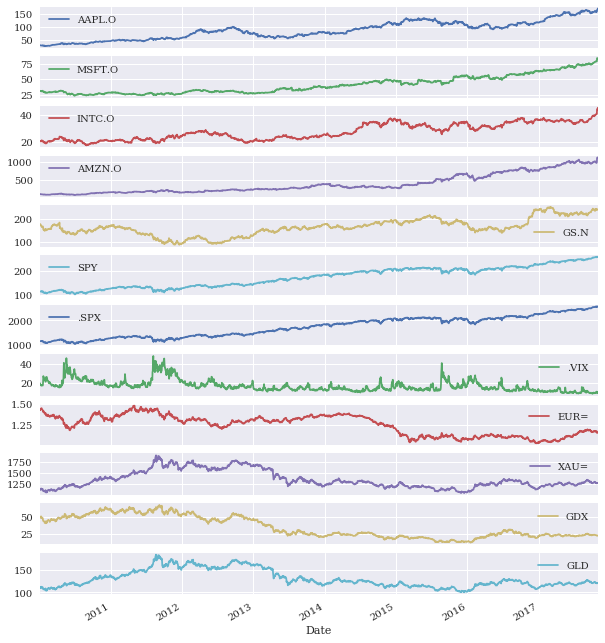

In [10]:
data.plot(figsize=(10, 12), subplots=True);    # This visualizes the complete data set via multiple subplots.

The data used is from the Thomson Reuters (TR) Eikon Data API. In the TR world symbols for financial instruments are called *Reuters Instrument Codes* (RICs). The financial instruments that the single RICs represent are:

In [11]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [13]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock
MSFT.O   | Microsoft Stock
INTC.O   | Intel Stock
AMZN.O   | Amazon Stock
GS.N     | Goldman Sachs Stock
SPY      | SPDR S&P 500 ETF Trust
.SPX     | S&P 500 Index
.VIX     | VIX Volatility Index
EUR=     | EUR/USD Exchange Rate
XAU=     | Gold Price
GDX      | VanEck Vectors Gold Miners ETF
GLD      | SPDR Gold Trust


## Summary Statistics

The next step the financial analyst might take is to have a look at different
summary statistics for the data set to get a “feeling” for what it is all about:

In [14]:
data.info()    # info() gives some metainformation about the DataFrame object.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [15]:
data.describe().round(2)    # describe() provides useful standard statistics per column.

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00,1972.00
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
25%,57.57,28.12,22.23,202.66,144.23,132.64,1325.53,13.25,1.13,1214.56,22.22,116.77
50%,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
75%,111.87,50.08,33.74,559.45,184.11,208.01,2080.15,19.20,1.35,1491.98,49.77,145.43
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


In [17]:
data.mean()    # The mean value per column.

AAPL.O      86.530152
MSFT.O      40.586752
INTC.O      27.701411
AMZN.O     401.154006
GS.N       163.614625
SPY        172.835399
.SPX      1727.538342
.VIX        17.209498
EUR=         1.252613
XAU=      1352.471593
GDX         34.499391
GLD        130.601856
dtype: float64

In [18]:
data.aggregate([min,    # The minimum value per column.
                np.mean,    # The mean value per column.
                np.std,    # The standard deviation per column.
                np.median,    # The median per column.
                max]    # The maximum value per column.
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.19,1.04,1051.36,12.47,100.50
mean,86.53,40.59,27.70,401.15,163.61,172.84,1727.54,17.21,1.25,1352.47,34.50,130.60
std,34.04,14.39,5.95,257.12,37.17,42.33,424.35,5.92,0.12,195.38,15.44,19.46
median,84.63,36.54,26.41,306.42,162.09,178.80,1783.81,15.65,1.29,1288.82,26.59,123.90
max,169.04,83.89,45.49,1110.85,252.89,257.71,2581.07,48.00,1.48,1897.10,66.63,184.59


## Changes over Time

Statistical analysis methods are often based on changes over time and not the absolute values themselves. There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [19]:
data.diff().head()    # diff() provides the absolute changes between two index values.

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.23,3.52,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55


In [20]:
data.diff().mean()    # Of course, aggregation operations can be applied in addition.

AAPL.O    0.070252
MSFT.O    0.026499
INTC.O    0.012486
AMZN.O    0.492836
GS.N      0.035211
SPY       0.072968
.SPX      0.731745
.VIX     -0.005003
EUR=     -0.000140
XAU=      0.076712
GDX      -0.012801
GLD       0.005515
dtype: float64

In [22]:
data.pct_change().round(3).head()    # pct_change() calculates the percentage change between two index values.

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.049,0.007,0.004,0.015,0.005


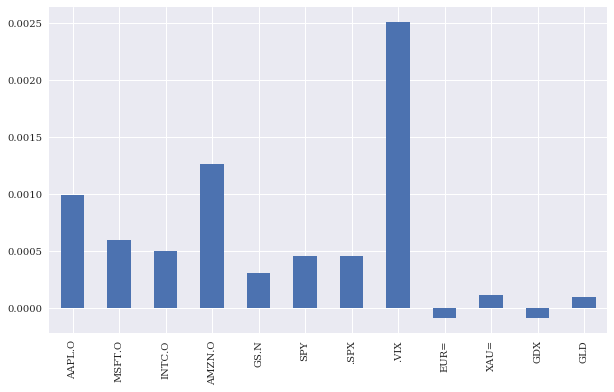

In [23]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));    # The mean values of the results are visualized as a bar plot.

In [28]:
rets = np.log(data / data.shift(1))    # Calculates the log returns in vectorized fashion.

In [29]:
rets.head().round(3)    # A subset of the results.

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006
2010-01-08,0.007,0.007,0.011,0.027,-0.019,0.003,0.003,-0.050,0.007,0.004,0.015,0.005


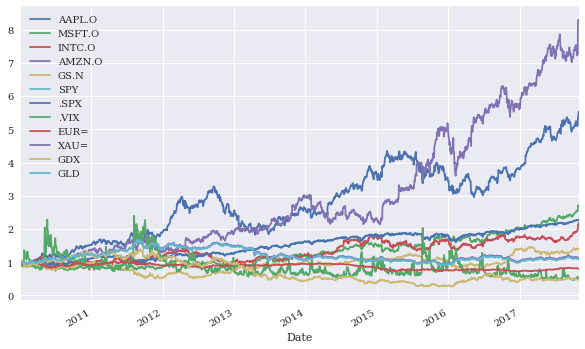

In [31]:
# Plots the cumulative log returns over time; first the cumsum() method is
# called, then np.exp() is applied to the results.
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of *downsampling*, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations:

In [41]:
data.resample('1w', label='right').last().head()    # EOD data gets resampled to weekly time intervals …

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.922829,28.02,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68


When resampling, pandas takes by default in many cases the left label (or index value) of the interval. To be **financially consistent**, make sure to use the right label (index value) and in general the last available data point in the interval. Otherwise, a foresight bias might sneak into the financial analysis.

> *Foresight bias* -- or, in its strongest form, *perfect foresight* -- means that at some point in the financial analysis, **data is used that only becomes available at a later point**. The result might be "too good" results, for example, when back testing a trading strategy.

In [37]:
data.resample('1m', label='right').last().head()    # … and monthly time intervals.

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2267,1213.81,49.86,118.881


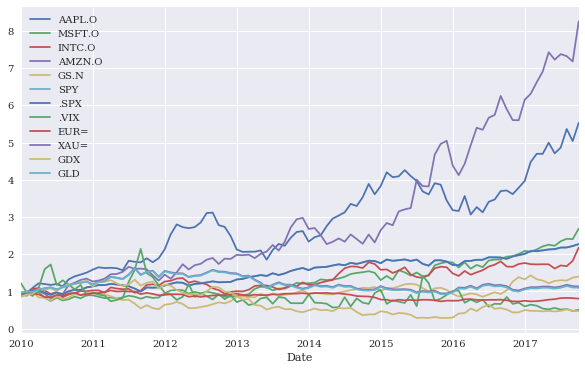

In [39]:
# This plots the cumulative log returns over time: first, the cumsum() method
# is called, then np.exp() is applied to the results; finally, the resampling
# takes place.
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6));

# Rolling Statistics

It is financial tradition to work with *rolling statistics*, often also called *financial indicators* or *financial studies*. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single financial time series only:

In [42]:
sym = 'AAPL.O'

In [43]:
data = pd.DataFrame(data[sym]).dropna()

In [46]:
data.tail()

,AAPL.O
Date,
2017-10-25,156.41
2017-10-26,157.41
2017-10-27,163.05
2017-10-30,166.72
2017-10-31,169.04


## An Overview

It is straightforward to derive standard rolling statistics with pandas:

In [47]:
window = 20    # Defines the window; i.e., the number of index values to include.

In [48]:
data['min'] = data[sym].rolling(window=window).min()     # Calculates the rolling minimum value.

In [49]:
data['mean'] = data[sym].rolling(window=window).mean()    # Calculates the rolling mean value.

In [50]:
data['std'] = data[sym].rolling(window=window).std()    # Calculates the rolling standard deviation.

In [51]:
data['median'] = data[sym].rolling(window=window).median()    # Calculates the rolling median value.

In [52]:
data['max'] = data[sym].rolling(window=window).max()     # Calculates the rolling maximum value.

In [53]:
# Calculates the exponentially weighted moving average, with decay in terms of a half life of 0.5.
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()

The following code shows a subset of the results and visualizes a selection of the calculated rolling statistics:

In [54]:
data.dropna().head()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2010-02-01,27.818544,27.437544,29.580892,0.933650,29.821542,30.719969,27.805432
2010-02-02,27.979972,27.437544,29.451249,0.968048,29.711113,30.719969,27.936337
2010-02-03,28.461400,27.437544,29.343035,0.950665,29.685970,30.719969,28.330134
2010-02-04,27.435687,27.435687,29.207892,1.021129,29.547113,30.719969,27.659299
2010-02-05,27.922829,27.435687,29.099892,1.037811,29.419256,30.719969,27.856947


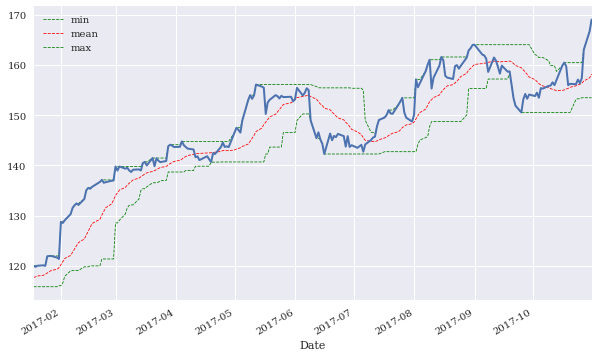

In [59]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)    # Plots three rolling statistics for the final 200 data rows.
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);    # Adds the original time series data to the plot.

## A Technical Analysis Example

Rolling statistics are a major tool in the so-called *technical analysis* of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analyzed.

A decades-old trading strategy based on technical analysis is using two *simple moving averages* (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame object.

In [60]:
data['SMA1'] = data[sym].rolling(window=42).mean()    # Calculates the values for the shorter-term SMA.

In [61]:
data['SMA2'] = data[sym].rolling(window=252).mean()    # Calculates the values for the longer-term SMA.

In [65]:
data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL.O,SMA1,SMA2
Date,,,
2017-10-25,156.41,157.610952,139.862520
2017-10-26,157.41,157.514286,140.028472
2017-10-27,163.05,157.517619,140.221210
2017-10-30,166.72,157.597857,140.431528
2017-10-31,169.04,157.717857,140.651766


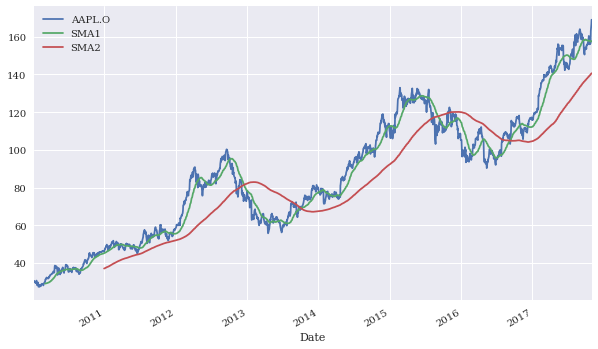

In [63]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));    # Visualizes the stock price data plus the two SMA time series.

In [67]:
data.dropna(inplace=True)    # Only complete data rows are kept.

In [68]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],    # If the shorter-term SMA value is greater than the longer-term one …
                             1,    # … go long on the stock (put a 1).
                             -1)    # Otherwise, go short on the stock (put a -1).

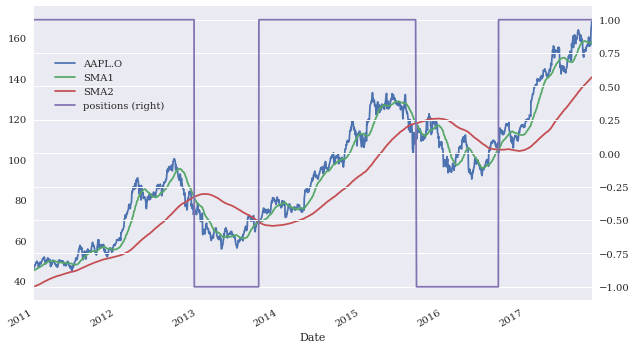

In [82]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                                   secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

The trading strategy implicitly derived here only leads to a few trades per se: only when the position value changes (i.e., a crossover happens) does a trade take place. Including opening and closing trades, this would add up to just six trades in total.

# Correlation Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index. It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about *correlation* and not *causation*. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

One reason behind this is that when the stock index comes down -- during a crisis, for instance -- trading volume goes up, and therewith also the volatility. When the stock index is on the rise, investors generally are calm and do not see much incentive to engage in heavy trading. In particular, long-only investors then try to ride the trend even further.

## The Data

In [84]:
# Reads the EOD data (originally from the Thomson Reuters Eikon Data
# API) from a CSV file.
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [87]:
data = raw[['.SPX', '.VIX']].dropna()

In [88]:
data.tail()

,.SPX,.VIX
Date,,
2017-10-25,2557.15,11.23
2017-10-26,2560.40,11.30
2017-10-27,2581.07,9.80
2017-10-30,2572.83,10.50
2017-10-31,2575.26,10.18


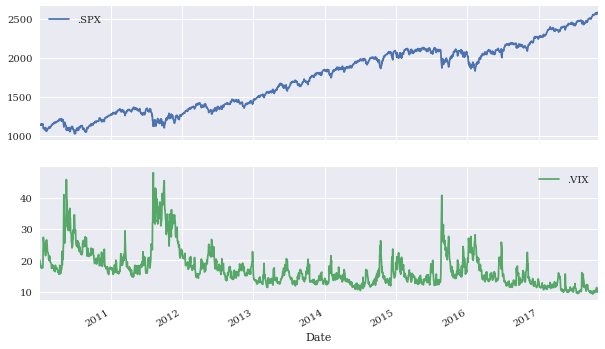

In [89]:
data.plot(subplots=True, figsize=(10, 6));

When plotting (parts of) the two time series in a single plot and with adjusted scalings, the stylized fact of **negative correlation** between the two indices becomes evident through simple visual inspection:

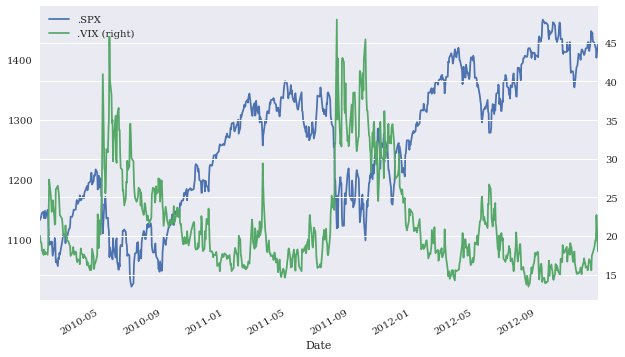

In [90]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));
# .loc[:DATE] selects the data until the given value DATE.

## Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we'll calculate log returns first before any further analysis takes place. For both indices so-called "volatility clusters" can be spotted. In general, periods of high volatility in the stock index are accompanied by the same phenomena in the volatility index:

In [111]:
rets = np.log(data / data.shift(1))

In [112]:
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


In [114]:
rets.dropna(inplace=True)

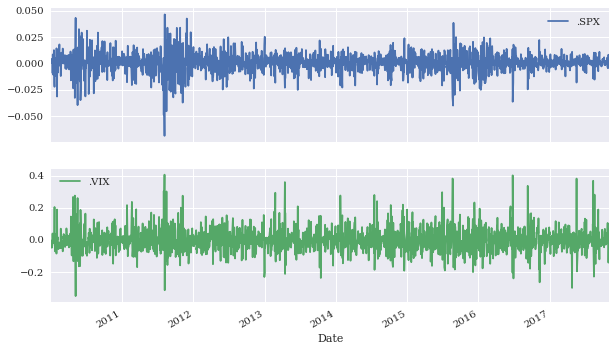

In [115]:
rets.plot(subplots=True, figsize=(10, 6));

In such a context, the pandas `scatter_matrix()` plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal:

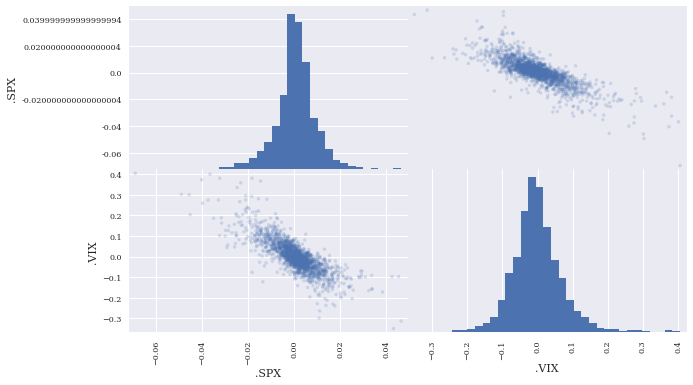

In [116]:
pd.plotting.scatter_matrix(rets,    # The data set to be plotted.
                           alpha=0.2,    # The alpha parameter for the opacity of the dots.
                           diagonal='hist',    # What to place on the diagonal; here: a histogram of the column data.
                           hist_kwds={'bins': 35},    # Keywords to be passed to the histogram plotting function.
                           figsize=(10, 6));

## OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement. The slope is obviously
negative, providing support for the stylized fact about the negative correlation between the two indices:

In [126]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)    # This implements a linear OLS regression.

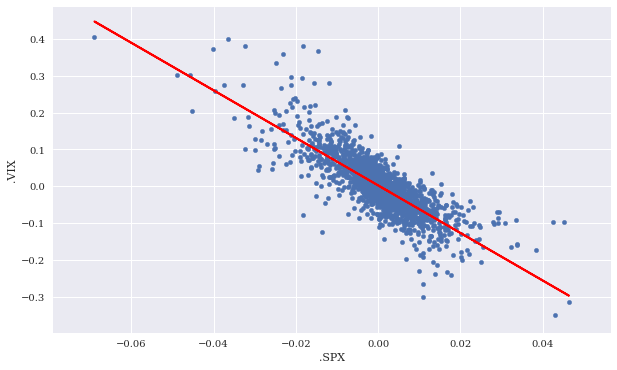

In [127]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))    # This plots the log returns as a scatter plot …
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);    # … to which the linear regression line is added.

## Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time. This provides strong support for the stylized fact that the S&P 500 and the VIX indices are (strongly) negatively correlated:

In [136]:
rets.corr()    # The correlation matrix for the whole DataFrame.

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000


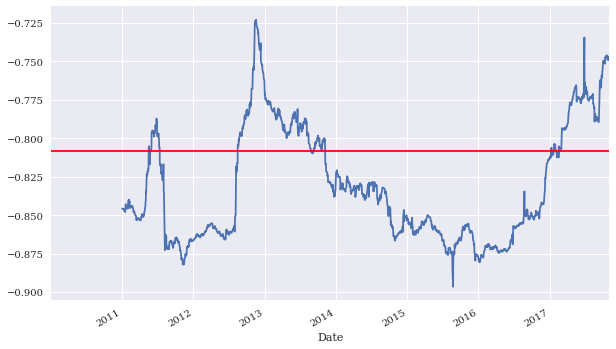

In [137]:
# This plots the rolling correlation over time …
ax = rets['.SPX'].rolling(window=252).corr( rets['.VIX']).plot(figsize=(10, 6))
# … and adds the static value to the plot as horizontal line.
ax.axhline(rets.corr().iloc[0, 1], c='r');

# High-Frequency Data

This chapter is about financial time series analysis with pandas. Tick data sets are a special case of financial time series. Frankly, they can be handled more or less in the same ways as, for instance, the EOD data set used throughout this chapter so far. Importing such data sets also is quite fast in general with pandas. The data set used comprises 17,352 data rows:

In [138]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('fxcm_eur_usd_tick_data.csv',
index_col=0, parse_dates=True)

CPU times: user 22.3 ms, sys: 3.33 ms, total: 25.6 ms
Wall time: 24.1 ms


In [139]:
tick.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17352 entries, 2017-11-10 12:00:00.007000 to 2017-11-10 14:00:00.131000
Data columns (total 2 columns):
Bid    17352 non-null float64
Ask    17352 non-null float64
dtypes: float64(2)
memory usage: 406.7 KB


In [140]:
tick['Mid'] = tick.mean(axis=1)    # Calculates the Mid price for every data row.

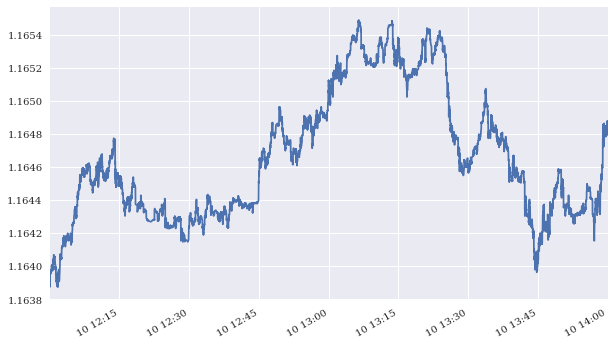

In [141]:
tick['Mid'].plot(figsize=(10, 6));

Working with tick data is generally a scenario where resampling of financial time series data is needed. The code that follows resamples the tick data to five-minute bar data, which can then be used, for example, to backtest algorithmic trading strategies or to implement a technical analysis:

In [142]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [143]:
tick_resam.head()

,Bid,Ask,Mid
2017-11-10 12:05:00,1.16425,1.16427,1.164260
2017-11-10 12:10:00,1.16454,1.16455,1.164545
2017-11-10 12:15:00,1.16449,1.16449,1.164490
2017-11-10 12:20:00,1.16437,1.16437,1.164370
2017-11-10 12:25:00,1.16429,1.16430,1.164295


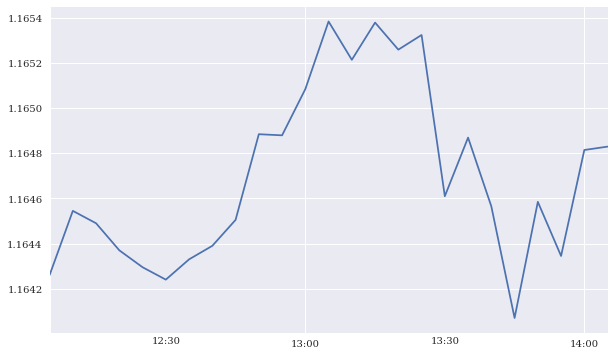

In [144]:
tick_resam['Mid'].plot(figsize=(10, 6));

# Conclusion

This chapter deals with financial time series, probably the most important data type in the financial field. `pandas` is a powerful package to deal with such data sets, allowing not only for efficient data analyses but also easy visualizations, for instance. `pandas` is also helpful in reading such data sets from different sources as well as in exporting the data sets to different technical file formats. This is illustrated in the subsequent chapter.